In [25]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import math
import sys

import skinny
import helpers 
import dpautils

from scipy import stats
from array import array
from operator import xor

np.set_printoptions(threshold=sys.maxsize)

In [26]:
N=20
std=0.5
number_of_experiments=1

TK1_0=[0,1,2,3] # 3x traces
TK1_1=[4,5,6,7]
TK1_2_unsorted=[0,1,2,3] # 3x traces
Tk1_3_unsorted=[8,9,10,11]

keys=np.random.randint(2147483647, 9223372036854775807, size=number_of_experiments, dtype=np.int64)  

In [27]:
P=helpers.gen_plaintexts(N)

# Precompute intermediate values and power traces for different keys

intermediate_values=[]
for key in keys:
    val=dpautils.compute_intemediate_values(P,int(keys[0]))
    interm_values=val[0]
    clear_text=val[1]
    TK1=val[2].A1
    T = dpautils.gen_traces(interm_values, std)
    intermediate_values.append([interm_values,clear_text,TK1,T])

# Attacking TK1_0 (first row of TK1)
Three rows of the internal state depend on the same four Tweakey nibbles. Exploiting this by getting "three traces per trace"

## Simultanous attack

In [28]:
simultanous_success_rate_pr_n=[]
Ns=list(range(1,N,1))
for n in Ns:
    probs=[]
    
    for i,key in enumerate(keys):
        clear_text = intermediate_values[i][1]
        TK1 = intermediate_values[i][2]
        T = intermediate_values[i][3]
        
        TK1_0_guess=[]
        
        # Attack TK1 nibble i (first row of TK1)
        for i in range(4): 
            t=T[:n]
            ct=clear_text[:n]
            nibble_guess=dpautils.simultanous_atk(t,ct,i)
            TK1_0_guess.append(nibble_guess)
            
        #_____SUCCESS/FAIL_________________
        if(np.array_equal(TK1[0:4],TK1_0_guess)):
            probs.append(1)
        else:
            probs.append(0)
    simultanous_success_rate_pr_n.append(np.average(probs))

## Majority Vote

In [29]:
majority_vote_success_rate_pr_n=[]
Ns=list(range(1,N,1))
for n in Ns:
    probs=[]
    
    for i,key in enumerate(keys):
        clear_text = intermediate_values[i][1]
        TK1 = intermediate_values[i][2]
        T = intermediate_values[i][3]
        TK1_0_guess=[]
        
        # Attack TK1 nibble i (first row of TK1)
        for i in range(4): 
            t=T[:n]
            ct=clear_text[:n]
            nibble_guess=dpautils.majority_vote_atk(t,ct,i)
            TK1_0_guess.append(nibble_guess)
            
        #_____SUCCESS/FAIL_________________
        if(np.array_equal(TK1[0:4],TK1_0_guess)):
            probs.append(1)
        else:
            probs.append(0)
    majority_vote_success_rate_pr_n.append(np.average(probs))

## unanimous attack

In [30]:
unanimous_success_rate_pr_n=[]
Ns=list(range(1,N,1))
for n in Ns:
    probs=[]
    
    for i,key in enumerate(keys):
        clear_text = intermediate_values[i][1]
        TK1 = intermediate_values[i][2]
        T = intermediate_values[i][3]
        TK1_0_guess=[]
        
        # Attack TK1 nibble i (first row of TK1)
        for i in range(4): 
            t=T[:n]
            ct=clear_text[:n]
            nibble_guess=dpautils.unanimous_attack(t,ct,i)
            TK1_0_guess.append(nibble_guess)
            
        #_____SUCCESS/FAIL_________________
        if(np.array_equal(TK1[0:4],TK1_0_guess)):
            probs.append(1)
        else:
            probs.append(0)
    unanimous_success_rate_pr_n.append(np.average(probs))

In [31]:
## Individual attack

In [32]:
individual_attack_success_rate_pr_n=[]
Ns=list(range(1,N,1))
for n in Ns:
    probs=[]
    
    for i,key in enumerate(keys):
        clear_text = intermediate_values[i][1]
        TK1 = intermediate_values[i][2]
        T = intermediate_values[i][3]
        TK1_0_guess=[]
        
        # Attack TK1 nibble i (first row of TK1)
        for i in range(4): 
            t=T[:n]
            ct=clear_text[:n]
            nibble_guess=dpautils.individual_atk(t,ct,i)
            TK1_0_guess.append(nibble_guess)
            
        #_____SUCCESS/FAIL_________________
        if(np.array_equal(TK1[0:4],TK1_0_guess)):
            probs.append(1)
        else:
            probs.append(0)
    individual_attack_success_rate_pr_n.append(np.average(probs))

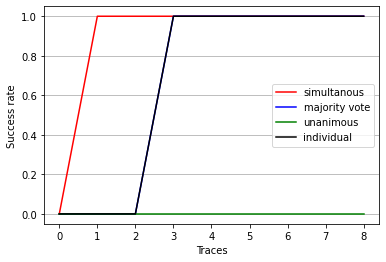

In [33]:

outfile="TK1-10-recovery-rate-std-"+str(std)+".png"

helpers.plot_multiple_attacks(simultanous_success_rate_pr_n, majority_vote_success_rate_pr_n, 
                 unanimous_success_rate_pr_n, individual_attack_success_rate_pr_n,
                 "simultanous","majority vote",
                 "unanimous","individual",
                outfile)
    

In [34]:
# Recover second row of TK1

As only a single row of the internal state depend on TK1_1, only individual attack is usable

SyntaxError: invalid syntax (<ipython-input-34-9490bf06e663>, line 3)

In [35]:
individual_attack_success_rate_pr_n_tk11=[]
Ns=list(range(1,N,1))
for n in Ns:
    probs=[]
    
    for i,key in enumerate(keys):
        clear_text = intermediate_values[i][1]
        TK1 = intermediate_values[i][2]
        T = intermediate_values[i][3]
        TK1_0_guess=[]
        
        # Attack TK1 nibble i (first row of TK1)
        for i in range(4,8,1): 
            t=T[:n]
            ct=clear_text[:n]
            nibble_guess=dpautils.individual_atk(t,ct,i)
            TK1_0_guess.append(nibble_guess)
            
        #_____SUCCESS/FAIL_________________
        if(np.array_equal(TK1[4:8],TK1_0_guess)):
            probs.append(1)
        else:
            probs.append(0)
    individual_attack_success_rate_pr_n_tk11.append(np.average(probs))

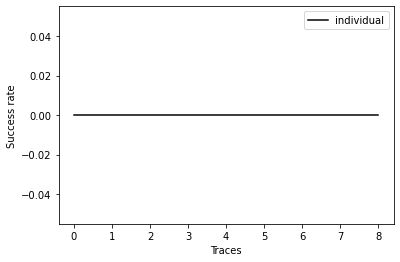

In [36]:
outfile=outfile="TK1-11-recovery-rate-std-"+str(std)+".png"
helpers.plot_single_attack(individual_attack_success_rate_pr_n_tk11,"individual",outfile)

# Second half of TK1
More or less identical to first half with the output of round 1 (2) as plaintext